In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_pickle('../../data/processed/cf_mc_ino_pino_of_bt_ct.pkl')
train_df.head(2)

,lote,orden_encadenado_cf,lote_parental_cf,id_bio,f_h_inicio_cf,f_h_fin_cf,vol_ino_util_cf,turb_inicio_cultivo_cf,turb_fin_cultivo_cf,viab_final_cultivo_cf,...,vel_separacion_ct_first_cf,desc_parcial_ct_last_cf,desc_total_ct_last_cf,apertura_valvula_agua_ct_last_cf,caudal_ct_last_cf,contrapresion_ct_last_cf,presion_agua_ct_last_cf,vel_separacion_ct_last_cf,t_cent_th_cf,h_cent_th_cf
0,23019,1,nan,14615,2023-03-21 06:30:00+00:00,2023-03-23 05:30:00+00:00,82.4,17.28,91.2,184000000.0,...,0.0,0.0,0.0,100.0,0.0,0.410067,NaN,0.0,20.424524,48.063608
1,23020,1,nan,14616,2023-03-21 06:30:00+00:00,2023-03-23 05:30:00+00:00,80.4,18.80,91.2,181600000.0,...,0.0,0.0,0.0,100.0,0.0,0.427147,NaN,0.0,20.424524,48.063608


In [3]:
test_df = pd.read_pickle('../../data/processed/test_mc_ino_pino_of.pkl')
test_df.head(2)

,lote,orden_encadenado_cf,lote_parental_cf,id_bio,f_h_inicio_cf,f_h_fin_cf,vol_ino_util_cf,turb_inicio_cultivo_cf,turb_fin_cultivo_cf,viab_final_cultivo_cf,...,vel_separacion_ct_first_cf,desc_parcial_ct_last_cf,desc_total_ct_last_cf,apertura_valvula_agua_ct_last_cf,caudal_ct_last_cf,contrapresion_ct_last_cf,presion_agua_ct_last_cf,vel_separacion_ct_last_cf,t_cent_th_cf,h_cent_th_cf
0,24054,1,nan,14616,2024-04-16 06:12:00+00:00,2024-04-18 05:28:00+00:00,81.6,15.44,85.60,184800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.452335,49.061788
1,24055,1,nan,14614,2024-04-13 06:18:00+00:00,2024-04-15 06:30:00+00:00,NaN,14.32,73.68,175200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.945495,40.394601


In [4]:
cols_to_check = ['turbidez_diff_cf', 'turb_fin_cultivo_cf', 'pres_par_O2_1_bt_min_cf',
                'h_bio_th_cf', 'pres_par_O2_1_bt_cf', 'dur_ino', 'presion_agua_ct_min_cf',
                'total_sol_base_bt_cf', 'total_sol_base_bt_last_cf', 'contrapresion_ct_max_cf']

In [5]:
to_check_df_train = train_df[cols_to_check].copy()
# to_check_df_train.fillna(to_check_df_train.median(), inplace=True)
to_check_df_train.head(2)

,turbidez_diff_cf,turb_fin_cultivo_cf,pres_par_O2_1_bt_min_cf,h_bio_th_cf,pres_par_O2_1_bt_cf,dur_ino,presion_agua_ct_min_cf,total_sol_base_bt_cf,total_sol_base_bt_last_cf,contrapresion_ct_max_cf
0,73.92,91.2,0.000000,45.66376,3557.051142,NaN,NaN,18.11231,5.502757,0.412071
1,72.40,91.2,6.713794,45.66376,20.358323,NaN,NaN,2987.46715,7664.883277,0.428877


In [6]:
to_check_df_test = test_df[cols_to_check].copy()
# to_check_df_test.dropna(inplace=True)
to_check_df_test.head(2)

,turbidez_diff_cf,turb_fin_cultivo_cf,pres_par_O2_1_bt_min_cf,h_bio_th_cf,pres_par_O2_1_bt_cf,dur_ino,presion_agua_ct_min_cf,total_sol_base_bt_cf,total_sol_base_bt_last_cf,contrapresion_ct_max_cf
0,70.16,85.60,6.088228,52.349751,19.349948,88260.0,NaN,2503.167603,7183.130469,NaN
1,59.36,73.68,7.510098,45.095745,18.945250,89460.0,NaN,2144.212983,5964.056641,NaN


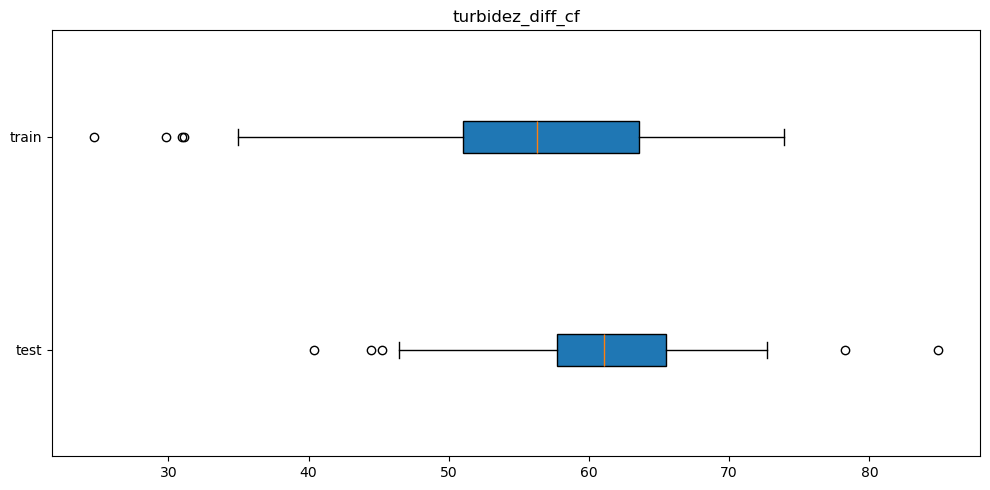

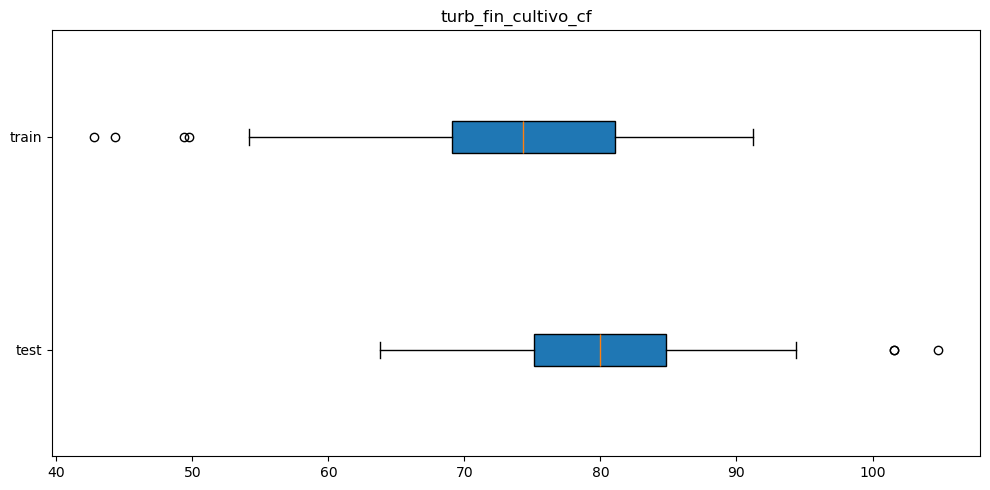

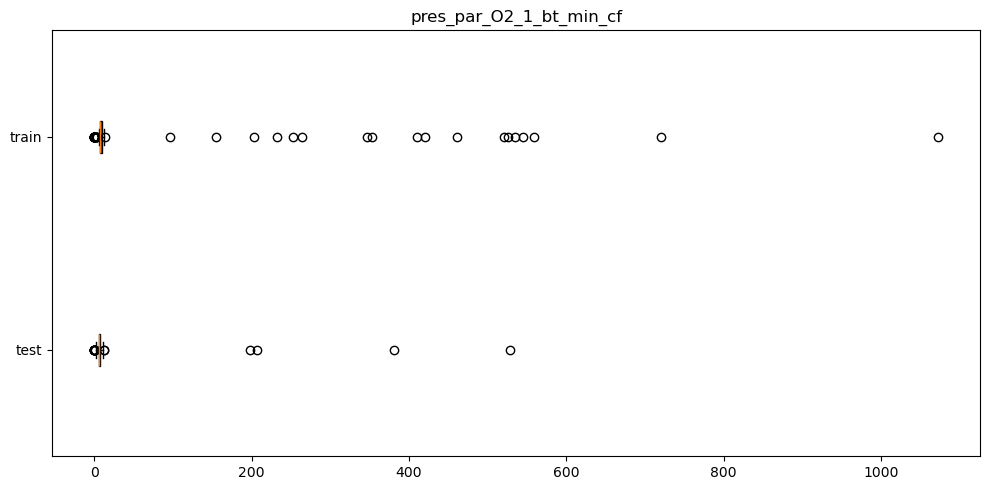

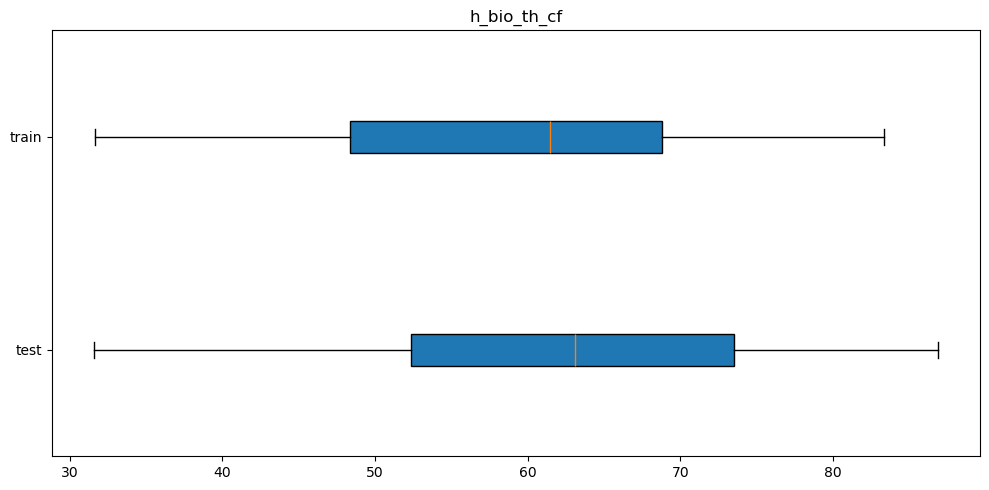

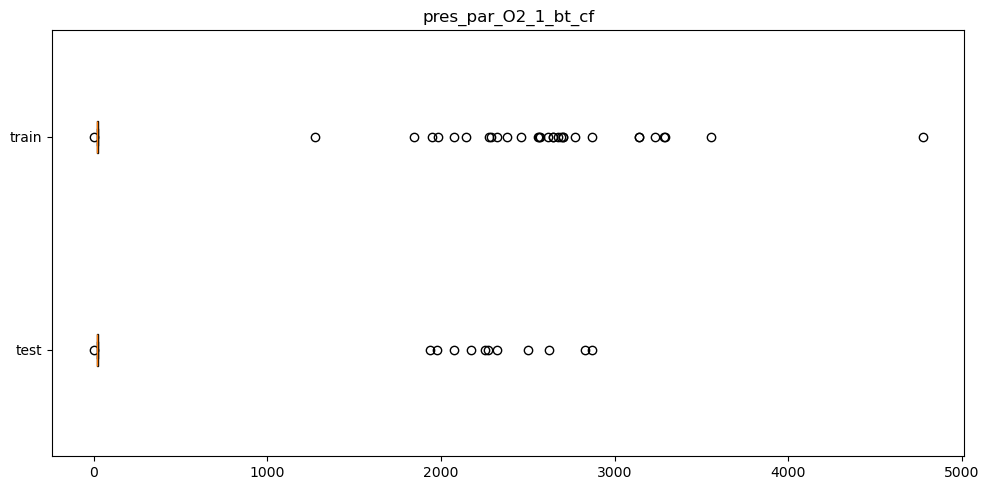

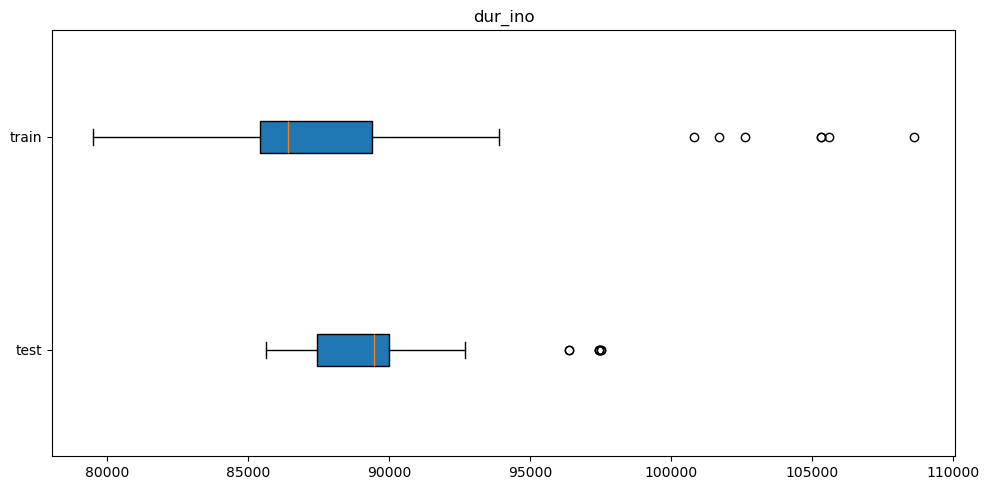

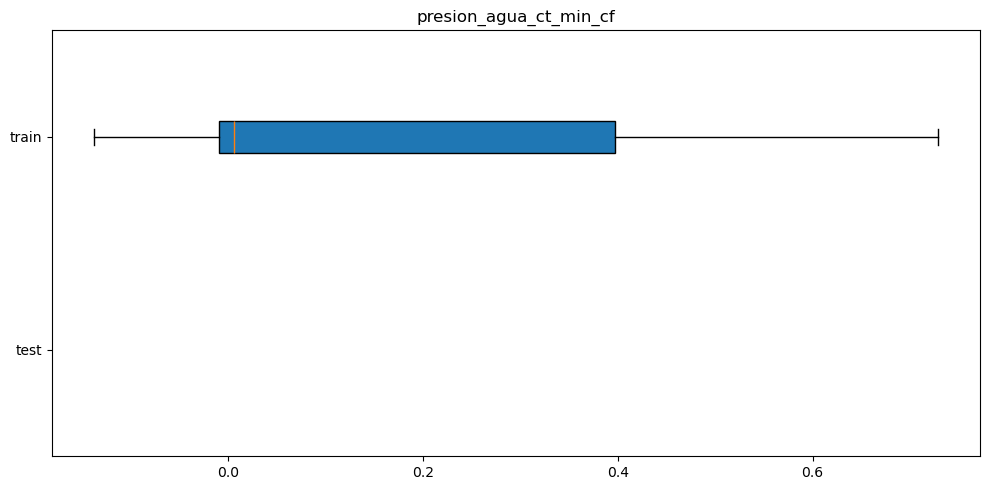

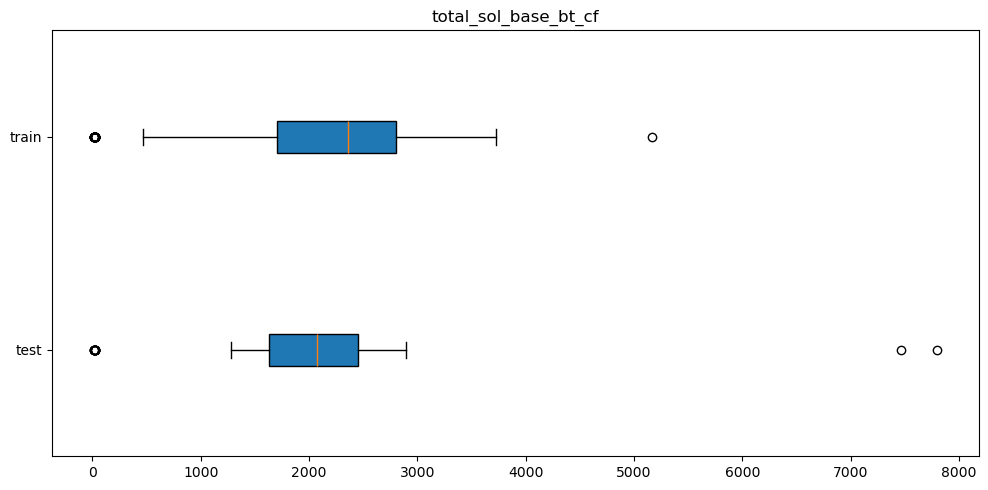

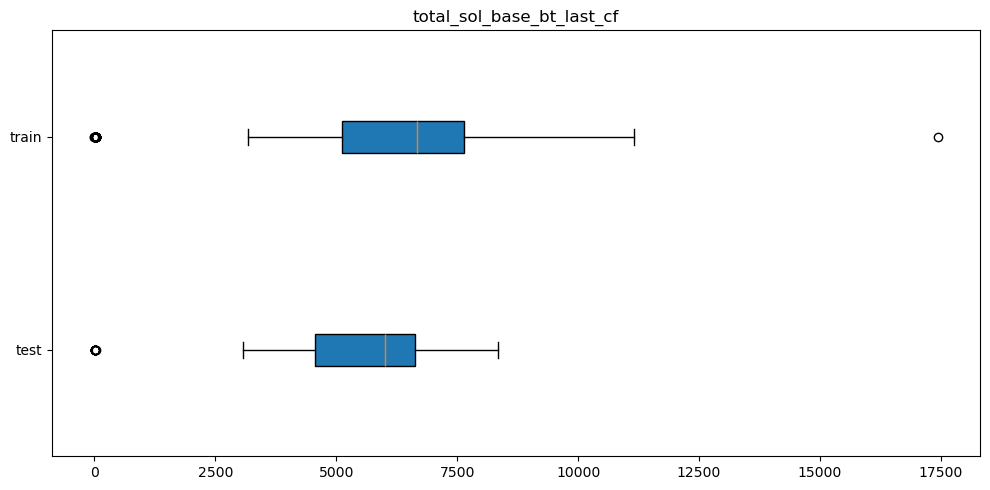

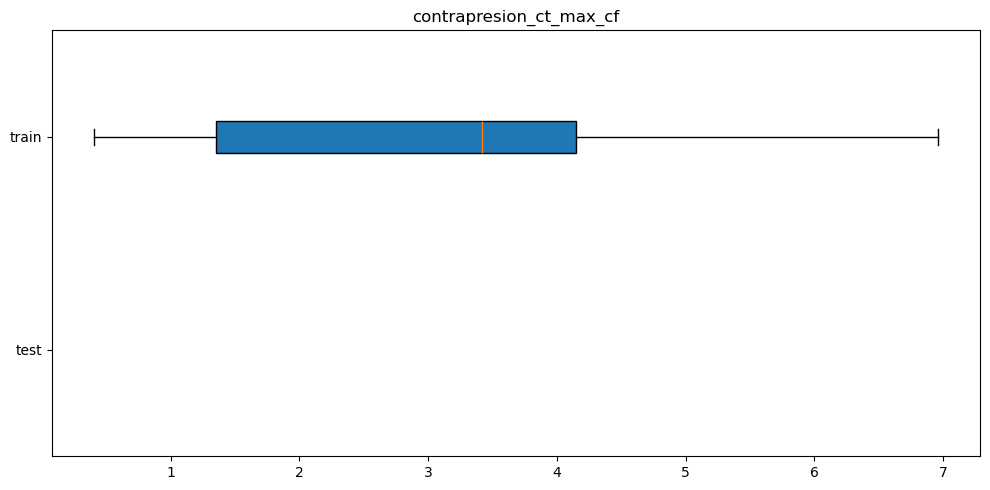

In [7]:
for col in to_check_df_train.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot([to_check_df_test[col].dropna(),to_check_df_train[col].dropna()], vert=False, patch_artist=True, labels=['test', 'train'])
    plt.title(f'{col}')
    # plt.legend()
    plt.tight_layout()
    plt.show()

In [8]:
def detect_outliers(df, col):
    outlier_indices = []
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
    return outlier_list_col

In [9]:
for col in to_check_df_train.select_dtypes(include=['float64', 'int64']).columns:
    print(f'Valores atípicos en {col}: {True if len(detect_outliers(to_check_df_train, col)) > 0 else False}')

Valores atípicos en turbidez_diff_cf: True
Valores atípicos en turb_fin_cultivo_cf: True
Valores atípicos en pres_par_O2_1_bt_min_cf: True
Valores atípicos en h_bio_th_cf: False
Valores atípicos en pres_par_O2_1_bt_cf: True
Valores atípicos en dur_ino: True
Valores atípicos en presion_agua_ct_min_cf: False
Valores atípicos en total_sol_base_bt_cf: True
Valores atípicos en total_sol_base_bt_last_cf: True
Valores atípicos en contrapresion_ct_max_cf: False


# pres_par_O2_1_bt_min_cf

In [10]:
upper_limit = to_check_df_train['pres_par_O2_1_bt_min_cf'].mean() + 3*to_check_df_train['pres_par_O2_1_bt_min_cf'].std()
upper_limit

527.8008416030725

In [11]:
to_check_df_train.drop(index = to_check_df_train[to_check_df_train['pres_par_O2_1_bt_min_cf'] > upper_limit].index.to_list(), inplace=True)

# pres_par_O2_1_bt_cf

In [12]:
upper_limit = to_check_df_train['pres_par_O2_1_bt_cf'].mean() + 3*to_check_df_train['pres_par_O2_1_bt_cf'].std()
upper_limit

3383.8348747688965

In [13]:
to_check_df_train.drop(index = to_check_df_train[to_check_df_train['pres_par_O2_1_bt_cf'] > upper_limit].index.to_list(), inplace=True)

# dur_ino

In [14]:
upper_limit = to_check_df_train['dur_ino'].mean() + 3*to_check_df_train['dur_ino'].std()
upper_limit

101546.05278140871

In [15]:
to_check_df_train.drop(index = to_check_df_train[to_check_df_train['dur_ino'] > upper_limit].index.to_list(), inplace=True)

# total_sol_base_bt_last_cf

In [16]:
upper_limit = to_check_df_train['total_sol_base_bt_last_cf'].mean() + 3*to_check_df_train['total_sol_base_bt_last_cf'].std()
upper_limit

15269.119820374617

In [17]:
to_check_df_train.drop(index = to_check_df_train[to_check_df_train['total_sol_base_bt_last_cf'] > upper_limit].index.to_list(), inplace=True)

In [18]:
to_check_df_train

,turbidez_diff_cf,turb_fin_cultivo_cf,pres_par_O2_1_bt_min_cf,h_bio_th_cf,pres_par_O2_1_bt_cf,dur_ino,presion_agua_ct_min_cf,total_sol_base_bt_cf,total_sol_base_bt_last_cf,contrapresion_ct_max_cf
1,72.40,91.20,6.713794,45.663760,20.358323,NaN,NaN,2987.467150,7664.883277,0.428877
2,70.24,86.40,6.177868,47.086366,18.846004,NaN,NaN,2962.187252,7907.745313,4.105607
3,64.72,83.20,9.314300,47.086366,19.681550,NaN,NaN,2957.527334,7878.989844,1.541435
4,57.28,74.40,0.000000,47.139569,3232.216955,86820.0,NaN,20.252208,22.228134,0.412091
5,64.24,80.80,6.936225,47.481150,19.795701,86820.0,NaN,2531.334382,7157.814844,4.161838
...,...,...,...,...,...,...,...,...,...,...
147,53.76,72.64,7.421848,55.962850,20.237413,92400.0,0.164378,1960.053756,6015.101953,1.688718
148,49.84,67.60,8.362435,54.041320,20.834938,90240.0,NaN,1759.503045,5185.023828,NaN
149,63.04,80.80,12.667349,54.041320,19.784536,90240.0,0.401408,2427.518385,7012.593143,0.411800
150,51.76,69.04,8.489854,50.004352,21.627376,90240.0,0.001556,2382.894156,5945.302734,2.551563


# Checking distributions after elimination of outliers

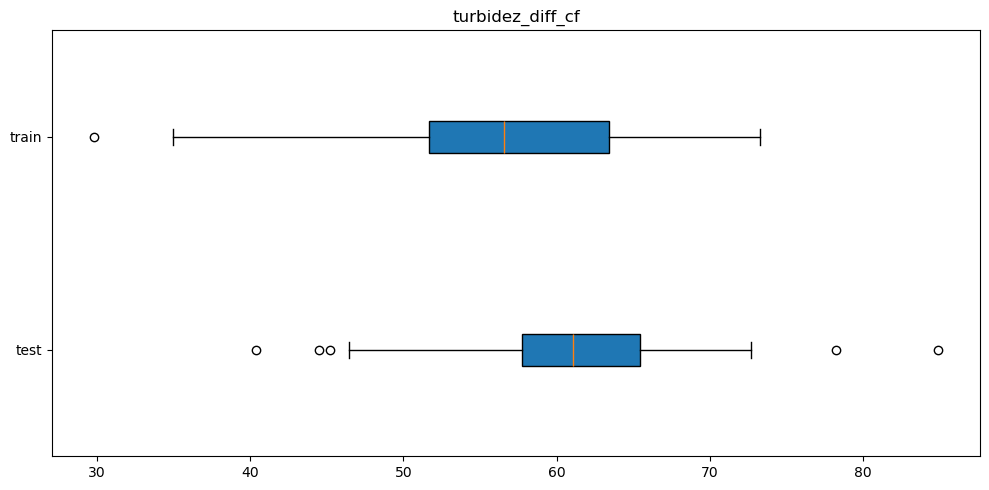

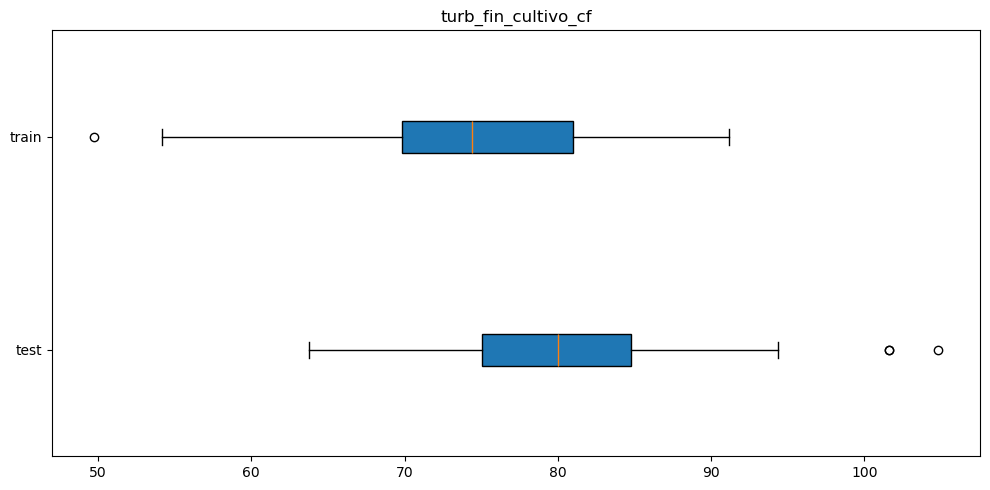

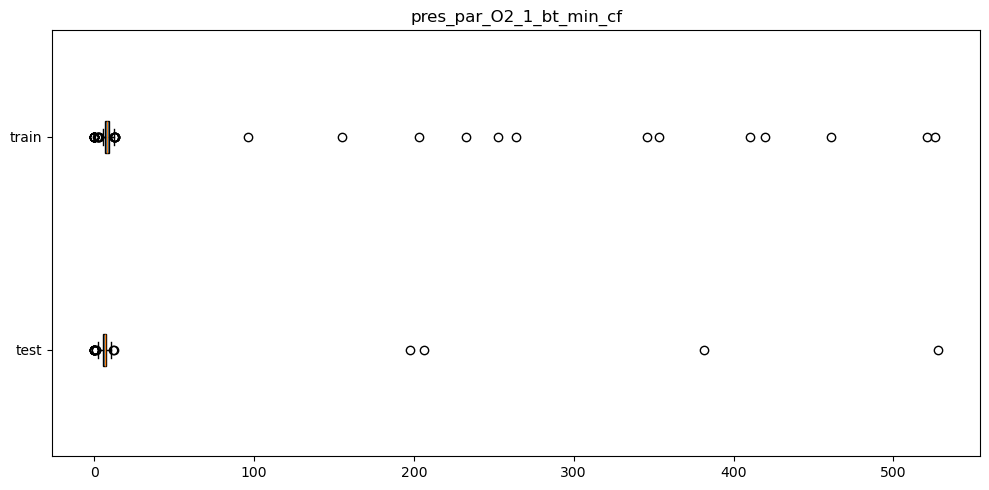

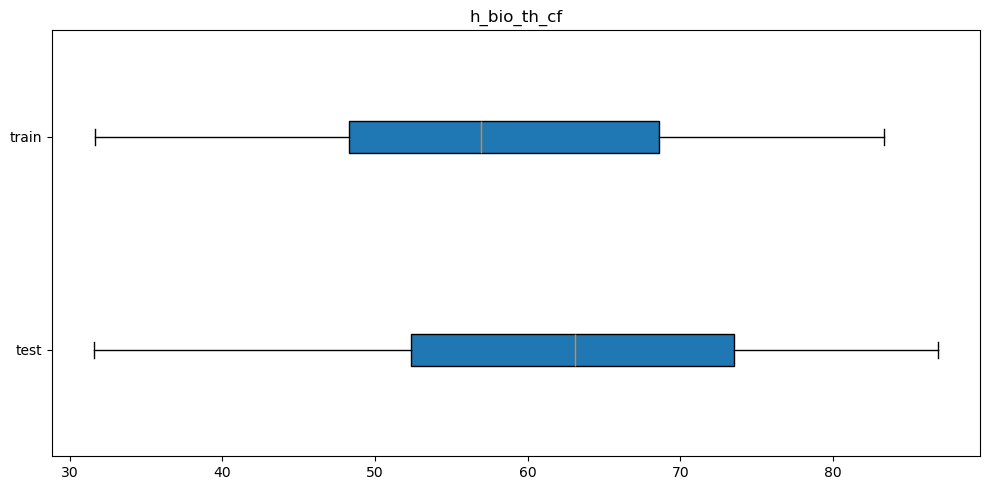

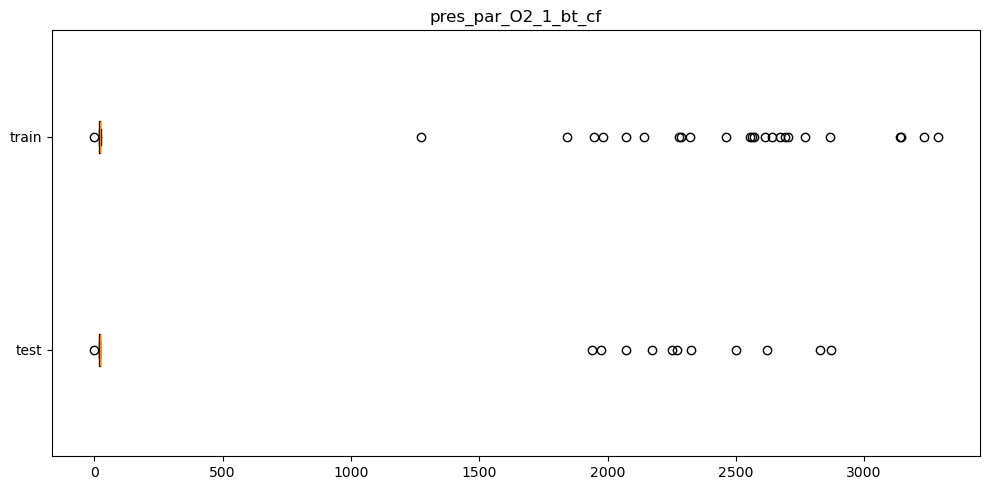

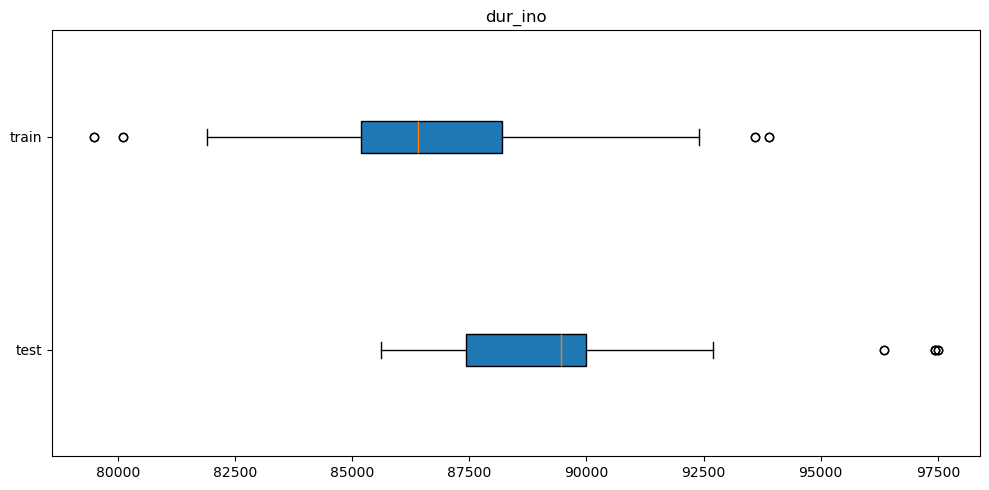

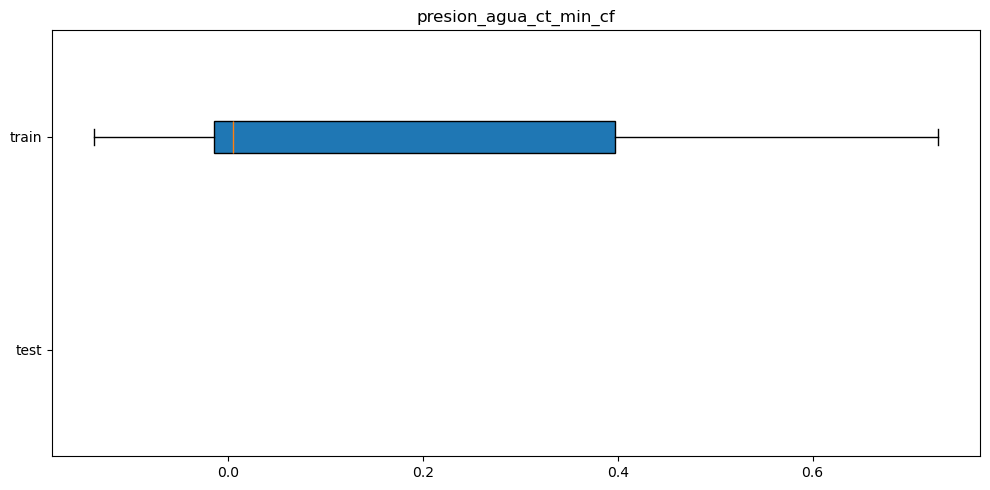

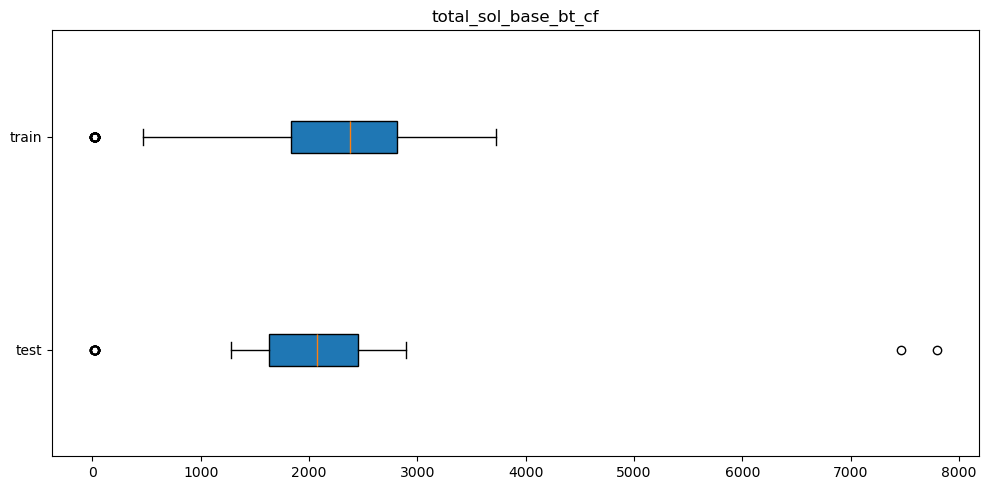

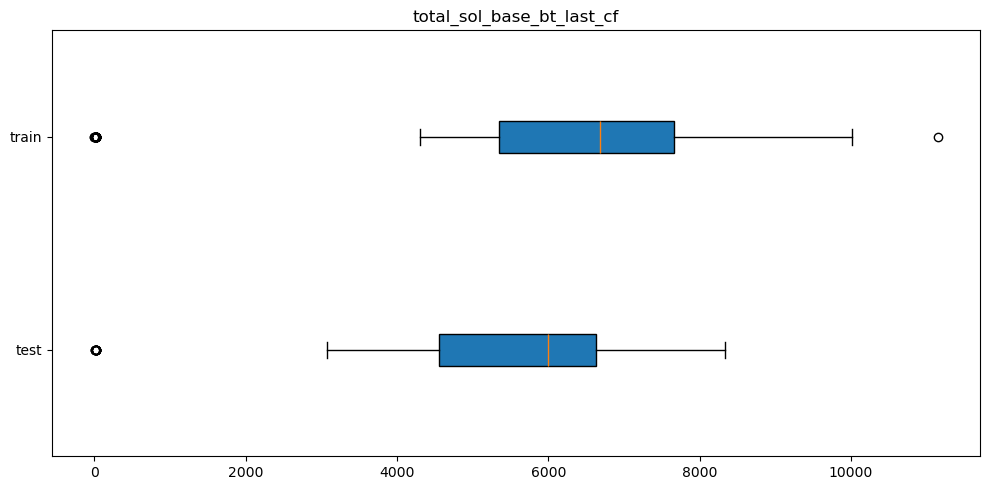

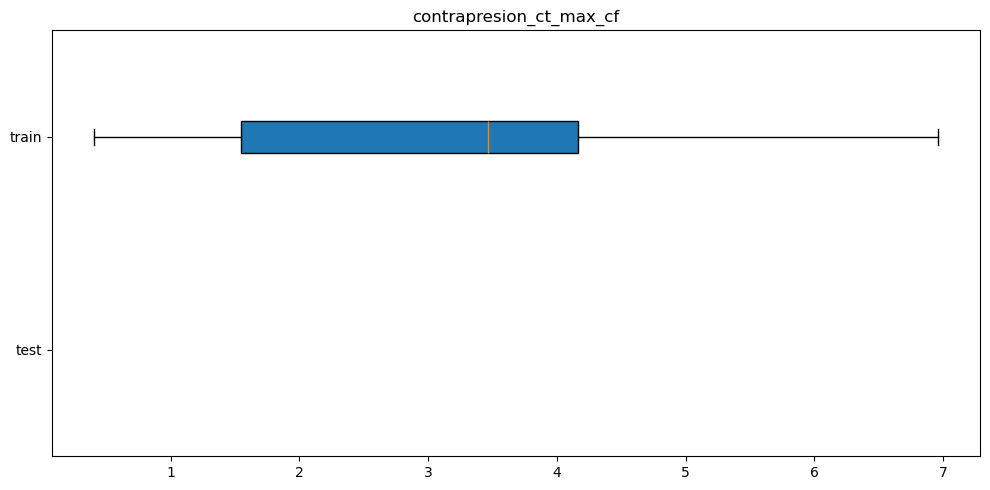

In [19]:
for col in to_check_df_train.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot([to_check_df_test[col].dropna(),to_check_df_train[col].dropna()], vert=False, patch_artist=True, labels=['test', 'train'])
    plt.title(f'{col}')
    # plt.legend()
    plt.tight_layout()
    plt.show()

# Save changes

In [20]:
train_df.update(to_check_df_train)

In [21]:
train_df = train_df.iloc[to_check_df_train.index.to_list(), :]

In [ ]:
path = '../../data/processed/'
train_df.to_pickle(path + 'train_no_outliers.pkl')